# 시계열 데이터 시각화

시계열 데이터의 시각화 방법으로 가장 일반적인 형태는 선(line) 차트이다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/walmart_stock.csv', index_col='Date', parse_dates=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Volume     1258 non-null   int64  
 5   Adj Close  1258 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


# 시계열 데이터 시각화
시계열 데이터는 선그래프로 시각화 할 수 있다.

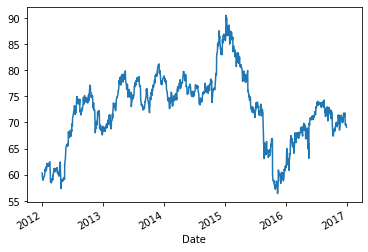

In [3]:
# 월마트 주식 종가를 시각화
df['Close'].plot()
plt.show()

<AxesSubplot:xlabel='Date'>

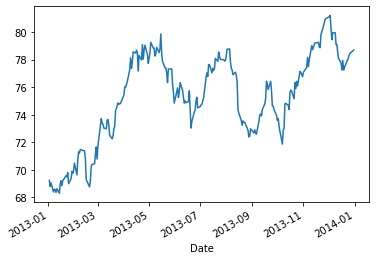

In [4]:
# 2013년도의 종가 정보만을 시각화
df['Close'].loc['2013'].plot()

<AxesSubplot:xlabel='Date'>

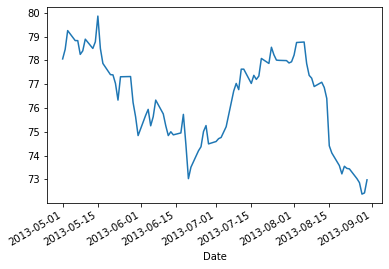

In [5]:
# 특정기간에 대한 시각화
df['Close'].loc['05-2013':'08-2013'].plot()

<AxesSubplot:xlabel='Date'>

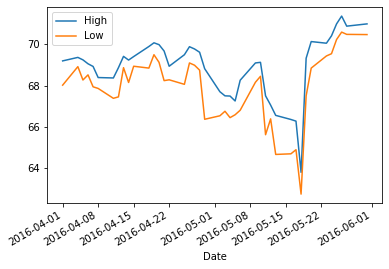

In [6]:
df.loc['2016-04':'2016-05'][['High','Low']].plot()

### resample 연산
resample 연산을 쓰면 시간 간격을 재조정하는 리샘플링(resampling)이 가능하다.   
오른쪽 한계값(가장 늦은 값)은 포함하지 않는다.

많이 사용되는 freq 인수값은 다음과 같다.

* s: 초
* T: 분
* H: 시간
* D: 일(day)
* B: 주말이 아닌 평일
* W: 주(일요일)
* W-MON: 주(월요일)
* M: 각 달(month)의 마지막 날
* MS: 각 달의 첫날
- BM: 주말이 아닌 평일 중에서 각 달의 마지막 날
- BMS: 주말이 아닌 평일 중에서 각 달의 첫날
- WOM-2THU: 각 달의 두번째 목요일
- Q-JAN: 각 분기의 첫달의 마지막 날
- Q-DEC: 각 분기의 마지막 달의 마지막 날

In [7]:
ts = pd.Series(np.random.randn(100), index=pd.date_range(
    "2019-1-1", periods=100, freq="D"))
ts.head(10)

2019-01-01    0.490598
2019-01-02   -0.007436
2019-01-03   -0.539472
2019-01-04   -0.334397
2019-01-05    1.734580
2019-01-06   -0.174787
2019-01-07   -0.632414
2019-01-08   -0.806724
2019-01-09   -0.367424
2019-01-10   -0.072886
Freq: D, dtype: float64

In [8]:
ts.resample('M').mean()

2019-01-31   -0.179699
2019-02-28    0.007398
2019-03-31    0.186982
2019-04-30   -0.192723
Freq: M, dtype: float64

In [9]:
ts.resample('M').first()

2019-01-31    0.490598
2019-02-28   -1.271393
2019-03-31    0.058684
2019-04-30    1.503742
Freq: M, dtype: float64

In [10]:
ts.resample('12H').mean()


2019-01-01 00:00:00    0.490598
2019-01-01 12:00:00         NaN
2019-01-02 00:00:00   -0.007436
2019-01-02 12:00:00         NaN
2019-01-03 00:00:00   -0.539472
                         ...   
2019-04-08 00:00:00   -1.461923
2019-04-08 12:00:00         NaN
2019-04-09 00:00:00   -1.597186
2019-04-09 12:00:00         NaN
2019-04-10 00:00:00    1.066049
Freq: 12H, Length: 199, dtype: float64

<AxesSubplot:xlabel='Date'>

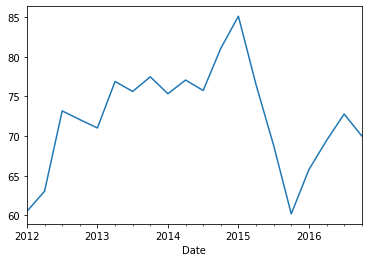

In [11]:
# 분기별 평균 종가를 선그래프로 표시
df['Close'].resample('Q').mean().plot()

<AxesSubplot:xlabel='Date'>

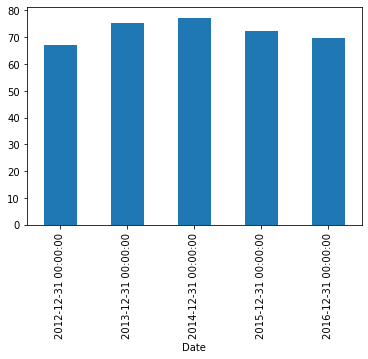

In [12]:
# 년도별 평균 종가를 막대그래프로 표시
df['Close'].resample('A').mean().plot(kind='bar')

# 이동평균을 사용한 추세 시각화

* **이동평균** 이란 일정 기간의 값을 산술 평균한 값이다.
* 이 기간을 5일로 사용한 것이 5일 이동평균이고 이를 연결한 것이 5일 이동평균 선이라 한다.
* 이동평균선을 통해 해당 시계열 데이터의 추세를 확인할 수 있다.

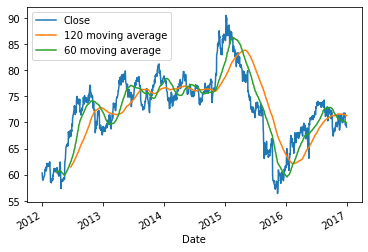

In [13]:
df['Close'].plot()
m_120=df['Close'].rolling(window=120).mean()
m_60 =df['Close'].rolling(window=60).mean()
m_120.plot(label='120 moving average')
m_60.plot(label='60 moving average')
plt.legend()

# 시계열 데이터 처리하기 실습

'./data/stock_px.csv' 에는 2003년 1월에서 2011년 10월 사이의 미국 주식 주가 데이터를 포함하고 있다. 
```
df = pd.read_csv('./data/stock_px.csv', parse_dates=True, index_col=0)
df.info()
```
* date : 날짜
* AAPL : 애플 주가
* MSFT : 마이크로소프트 주가
* XOM : 엑슨모빌 주가
* SPX : S&P 500 지수 

In [ ]:
import pandas as pd

df = pd.read_csv('./data/stock_px.csv', parse_dates=True, index_col=0)
df.info()

### 문제 1.
'AAPL' 애플 주식을 선그래프로 시각화 하시오.( hint. plot 메소드 사용)

### 문제2.
'AAPL' 애플 주식의 2011년 데이터만 선그래프로 시각화하시오.

### 문제3.
'AAPL' 애플 주식의 연도별('A') 평균을 막대그래프로 시각화하시오. (hint. resample 메소드의 사용)

### 문제 4.
'AAPL' 애플 주식의 120일 이동평균선을 선그래프로 시각화 하시오. (hint. rolling 사용)